In [82]:
import cv2 
import os 
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import drive 
from google.colab.patches import cv2_imshow

In [34]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-07-21 02:12:49--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-07-21 02:12:49 (10.6 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [1]:
!mkdir ./pretrained
!echo "##### downloading pretrained yolo/tiny-yolo weight file and config file"
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true 

!wget -O /content/pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O /content/pretrained/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

!ls /content/pretrained


##### downloading pretrained yolo/tiny-yolo weight file and config file
--2022-07-21 01:57:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3.weights’

/content/pretrained 100%[===================>] 236.52M  40.8MB/s    in 6.2s    

2022-07-21 01:57:19 (38.3 MB/s) - ‘/content/pretrained/yolov3.weights’ saved [248007048/248007048]

--2022-07-21 01:57:20--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2022-07-21 01:57:20--  https://github.com/p

In [3]:
import os
import cv2

weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'
#config 파일 인자가 먼저 옴. 
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [4]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [40]:
layer_names = cv_net_yolo.getLayerNames()
print('### yolo v3 layer name:', layer_names)
print('final output layer id:', cv_net_yolo.getUnconnectedOutLayers())
print('final output layer name:', [layer_names[i-1] for i in cv_net_yolo.getUnconnectedOutLayers()])
outlayer_names = [layer_names[i-1] for i in cv_net_yolo.getUnconnectedOutLayers()]

### yolo v3 layer name: ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'co

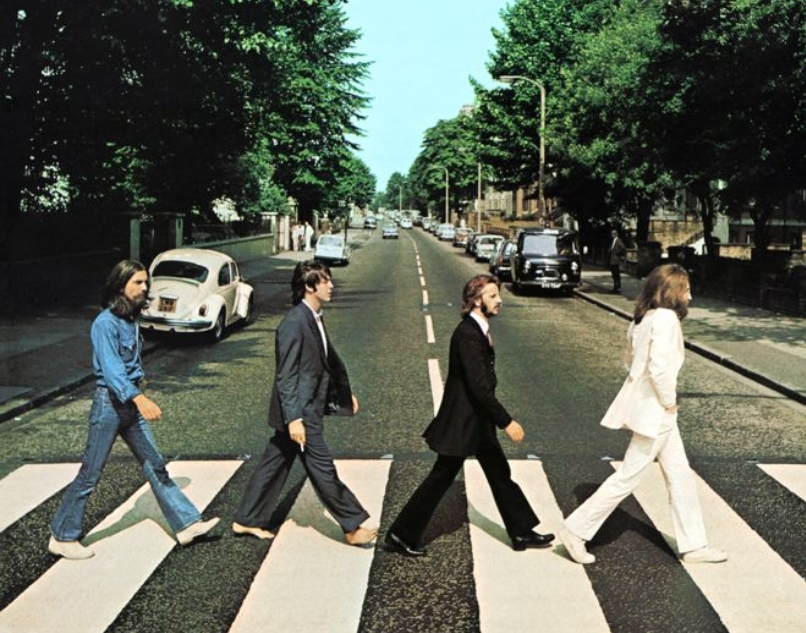

In [36]:
image = cv2.imread("./data/beatles01.jpg")
cv2_imshow(image)

In [48]:
cv_net_yolo.setInput(cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
cv_outs = cv_net_yolo.forward(outlayer_names)
print(f"cv_outs_type : {type(cv_outs)} {len(cv_outs)}")
print(f"{cv_outs[0].shape} \n{cv_outs[1].shape},\n{cv_outs[2].shape}")

print(f"{cv_outs[0]}")
# 13 * 13 * 3 
# 85 :
    # class : 80 
    # 5 : object coordinate, object confidence 
print(f"{cv_outs[1]}")
# 26 * 26 * 3 
    # 85 :
    # class : 80 
    # 5 : object coordinate, object confidence 

print(f"{cv_outs[2]}")
# 52 * 52 * 3 
    # 85 :
    # class : 80 
    # 5 : object coordinate, object confidence 




cv_outs_type : <class 'tuple'> 3
(507, 85) 
(2028, 85),
(8112, 85)
[[0.03803749 0.04702339 0.38768154 ... 0.         0.         0.        ]
 [0.04705836 0.03385845 0.26896036 ... 0.         0.         0.        ]
 [0.04941482 0.03791986 0.7151826  ... 0.         0.         0.        ]
 ...
 [0.9585798  0.9460585  0.35046622 ... 0.         0.         0.        ]
 [0.96015006 0.9630715  0.29724196 ... 0.         0.         0.        ]
 [0.9663636  0.9657401  0.7935606  ... 0.         0.         0.        ]]
[[0.01637368 0.02457962 0.04684628 ... 0.         0.         0.        ]
 [0.01678772 0.01458679 0.46203217 ... 0.         0.         0.        ]
 [0.02219823 0.01376948 0.0662718  ... 0.         0.         0.        ]
 ...
 [0.97421783 0.97686917 0.04557502 ... 0.         0.         0.        ]
 [0.98114103 0.9762939  0.33147967 ... 0.         0.         0.        ]
 [0.97884774 0.98335934 0.07896643 ... 0.         0.         0.        ]]
[[0.00859342 0.00442325 0.01781066 ... 0.    

In [ ]:
rows = image.shape[0]
cols = image.shape[1]
# print(image.shape, rows, cols)

conf_threshold = 0.5
nms_threshold = 0.4
green_color = (0, 255, 0)
red_color = (0, 0, 255)
class_ids = [] 
confidences = [] 
boxes = []

for ix, output in enumerate(cv_outs):
    print(output.shape)
    for jx, detection in enumerate(output):
        class_scores = detection[5:]
        class_id = np.argmax(class_scores)
        confidence = class_scores[class_id]

        if confidence > conf_threshold:     
            print(f"ix : {ix}, \njx : {jx}, \nclass_id : {class_id}, \nconfidences : {confidence}")   
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)

            width = int(detection[2] * cols)
            height = int(detection[3] * rows)

            left = int(center_x - (width/2))
            top = int(center_y - (height/2))  

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])


In [74]:
conf_threshold = 0.5
nms_threshold = 0.4
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

idxs

array([ 4, 17,  6, 15, 30, 28, 24, 32, 11,  8, 34, 33, 25, 29],
      dtype=int32)

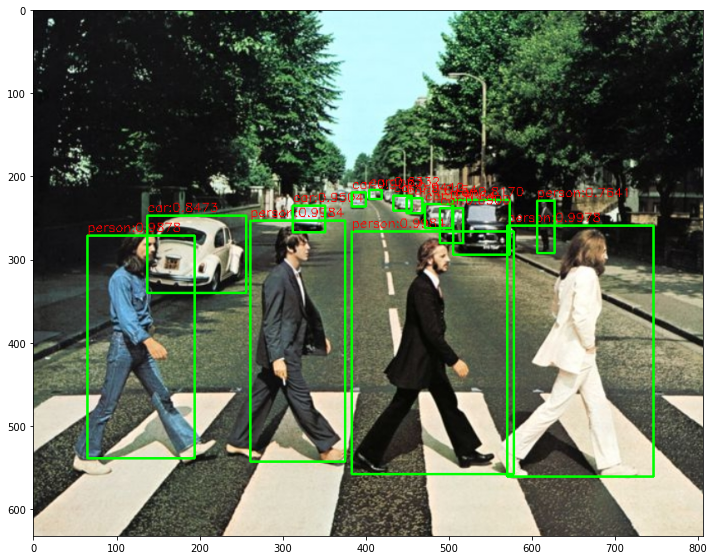

In [80]:
draw_image = image.copy()

if len(idxs)>0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]

        caption = "{}:{:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])

        cv2.rectangle(draw_image, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_image, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)

image_rgb = cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)


In [96]:
def get_detected_image(model, image_array, conf_threshold, nms_threshold, is_print):
    rows = image_array.shape[0]
    cols = image_array.shape[1]

    draw_image = image_array.copy()

    layer_name = model.getLayerNames()
    outputlayer_name = [layer_name[i-1] for i in  model.getUnconnectedOutLayers()]

    model.setInput(cv2.dnn.blobFromImage(image_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
    start = time.time()

    cv_outs = model.forward(outlayer_names)
    layerOutputs = model.forward(outlayer_names)

    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    classes_id = []
    confidences = []
    boxes = []

    for ix, output in enumerate(cv_outs):
        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
        
            if confidence > conf_threshold:
                center_x = int(detection[0] * cols)
                center_y = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)

                left = int(center_x - width / 2)
                top = int(center_y - height / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    if len(idxs) > 0 :
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]

            caption = "{}:{:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
            
            cv2.rectangle(draw_image, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
            cv2.putText(draw_image, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    
    if is_print:
        print('Detection time:',round(time.time() - start, 2),"초")
    return draw_image


Detection time: 3.33 초


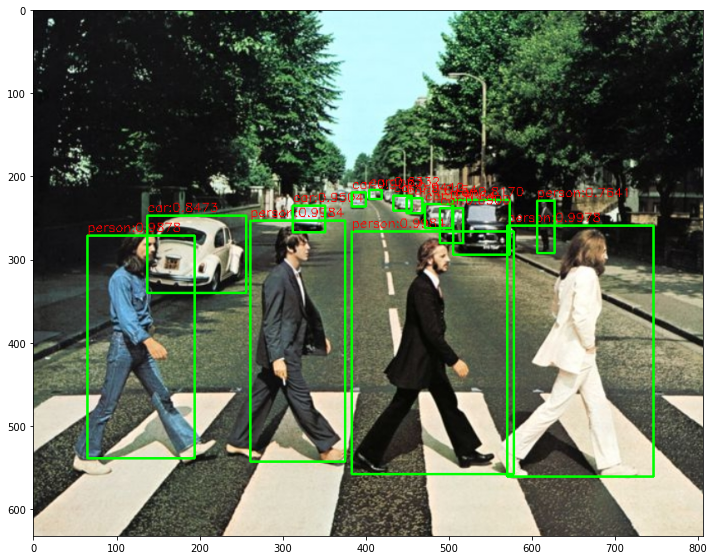

In [97]:
image = cv2.imread('/content/data/beatles01.jpg')

weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

conf_threshold = 0.5
nms_threshold = 0.4
draw_image = get_detected_image(cv_net_yolo, image, conf_threshold=conf_threshold, nms_threshold=nms_threshold, is_print=True)
image_rgb = cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
